# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

Based on the scatterplots below, I have reached the following conclusions:

-Latitudes near the equator have the highest max temperature and the max temperature decreases with distance from the equator. At this point of the year, the cities in the Northern hemisphere are mostly colder than cities in the Southern hemisphere. 

-There seems to be little to no correlation between latitude and humidity. Almost every latitude has cities with 100% humidity. If any trend, some cities in the Northern hemisphere near the equator have slightly lower humidity levels than other cities. 

-While there is not a clear relationship between latitude and cloudiness, there are many cities that have 0% cloudiness.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
length=len(cities)
length


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
count=0
print("Beginning Data Retrieval for",len(cities))     
print("-----------------------------")
for city in cities:

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    #print(query_url)

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if(int(weather_json["cod"]) == 404):
        print("Could not find " + city)
    else:
        count += 1
        citydict = {}
        citydict["City"] = weather_json["name"]
        city_data.append(citydict)
        
        citydict["Cloudiness"] = weather_json["clouds"]["all"]
    
        citydict["Country"] = weather_json["sys"]["country"]
      
        citydict["Date"] = weather_json["dt"]
     
        citydict["Humidity"] = weather_json["main"]["humidity"]
       
        citydict["Lat"] = weather_json["coord"]["lat"]
       
        citydict["Lng"] = weather_json["coord"]["lon"]
        
        citydict["Max_Temp"] = weather_json["main"]["temp_max"]
        
        citydict["Wind_Speed"] = (weather_json["wind"]["speed"])
       
        print(f"Processing record {count} | {city}.")
        

print("-----------------------------")
print(" Data Retrieval Complete")
print("-----------------------------")       
    

Beginning Data Retrieval for 624
-----------------------------
Could not find severnyy
Processing record 1 | tuatapere.
Processing record 2 | hilo.
Could not find mys shmidta
Processing record 3 | lodwar.
Processing record 4 | mataura.
Processing record 5 | flinders.
Could not find illoqqortoormiut
Processing record 6 | rikitea.
Processing record 7 | tongzi.
Processing record 8 | berlevag.
Could not find bengkulu
Processing record 9 | misratah.
Processing record 10 | butaritari.
Processing record 11 | plettenberg bay.
Processing record 12 | jamestown.
Processing record 13 | mtimbira.
Processing record 14 | bluff.
Processing record 15 | namatanai.
Processing record 16 | chuy.
Processing record 17 | leh.
Processing record 18 | hofn.
Could not find krasnoselkup
Processing record 19 | ilulissat.
Processing record 20 | punta arenas.
Processing record 21 | busselton.
Processing record 22 | albany.
Processing record 23 | luganville.
Processing record 24 | griffith.
Processing record 25 | naga

Processing record 222 | kumbo.
Processing record 223 | straumen.
Processing record 224 | shimoda.
Processing record 225 | nikolskoye.
Could not find nguiu
Processing record 226 | tefe.
Processing record 227 | touros.
Processing record 228 | nanortalik.
Processing record 229 | fortuna.
Processing record 230 | saint-joseph.
Processing record 231 | sarai.
Processing record 232 | coos bay.
Processing record 233 | ponta delgada.
Processing record 234 | waipawa.
Processing record 235 | monterey.
Processing record 236 | chicama.
Could not find eskasem
Processing record 237 | nador.
Processing record 238 | chopinzinho.
Processing record 239 | indiaroba.
Processing record 240 | bambous virieux.
Processing record 241 | saldanha.
Processing record 242 | hualmay.
Processing record 243 | port antonio.
Processing record 244 | trinidad.
Processing record 245 | sabang.
Processing record 246 | coihaique.
Could not find kousseri
Processing record 247 | cabo san lucas.
Could not find pingzhuang
Processin

Processing record 441 | arica.
Processing record 442 | marsa matruh.
Could not find guekedou
Processing record 443 | san francisco del mar.
Processing record 444 | montpellier.
Processing record 445 | marabba.
Processing record 446 | novyy urengoy.
Processing record 447 | persianovskiy.
Processing record 448 | makat.
Processing record 449 | sierra vista.
Could not find grand river south east
Processing record 450 | walvis bay.
Processing record 451 | mulheim-karlich.
Processing record 452 | shitkino.
Processing record 453 | fare.
Processing record 454 | gasa.
Processing record 455 | paita.
Processing record 456 | guasdualito.
Could not find tahta
Processing record 457 | mulchen.
Processing record 458 | buala.
Processing record 459 | chiriguana.
Processing record 460 | mahibadhoo.
Processing record 461 | am timan.
Processing record 462 | niksic.
Processing record 463 | alofi.
Processing record 464 | comodoro rivadavia.
Processing record 465 | castres.
Processing record 466 | maltahohe.


In [5]:
df=pd.DataFrame(city_data)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Tuatapere,44,NZ,1554072006,68,-46.13,167.69,285.930,2.24
1,Hilo,90,US,1554072512,69,19.71,-155.08,299.260,2.60
2,Lodwar,8,KE,1554072544,60,3.12,35.60,297.715,0.92
3,Mataura,24,NZ,1554072006,68,-46.19,168.86,285.930,2.24
4,Flinders,90,AU,1554072436,100,-34.58,150.85,293.150,5.10


In [6]:
df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max_Temp      549
Wind_Speed    549
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#export as CSV
df.to_csv(output_data_file)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

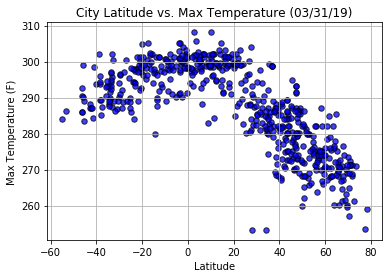

In [14]:
plt.scatter(df.Lat, df.Max_Temp, marker="o", s=30, facecolor= "Blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("scatterplots/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

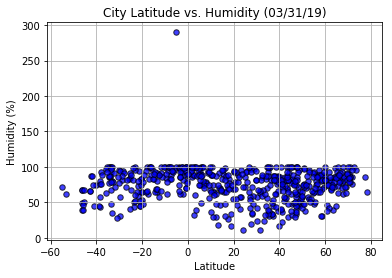

In [15]:
plt.scatter(df.Lat, df.Humidity, marker="o", s=30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("scatterplots/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

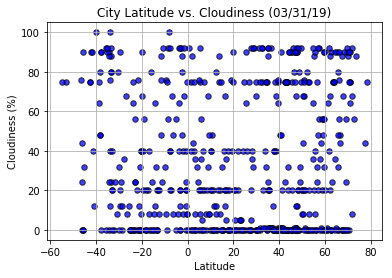

In [16]:
plt.scatter(df.Lat, df.Cloudiness, marker = "o", s=30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("scatterplots/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

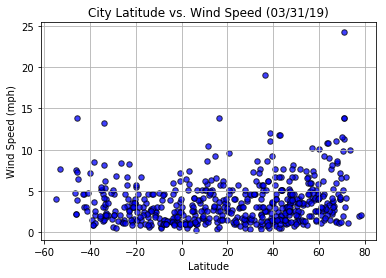

In [17]:
plt.scatter(df.Lat, df.Wind_Speed, marker= "o", s= 30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("scatterplots/windspeed.png")
plt.show()